# EDA Workbook

--- 

The purpose of this workbook is to play around with the cleansed data to look for relationships that I might want to include in the features or polynomial features section of the data.  Also, just getting a sense of what is in the dataset.

---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

% matplotlib inline

In [3]:
testfile = './datasets/test_nonulls5.csv'
df_test = pd.read_csv(testfile)

trainfile = './datasets/train_nonulls5.csv'
df = pd.read_csv(trainfile)



In [4]:
df.shape

(2051, 83)

In [5]:
## Inspect each variable -- histogram of train next test to see if any anomolies
# Inspect each variable -- correlation of train variable to sales price

train_var = df['Neighborhood']
test_var = df_test['Neighborhood']

def EDA_plot1(train_var, test_var):
    plt.hist(train_var)
    plt.hist(test_var, color='c')
    plt.show();

def EDA_plot2(train_var, target):
    a = train_var.dtypes

    if a == 'object':
        target = df['SalePrice']
        var_list = list(set(train_var))

        var_dict = {}
        n=0
        for each in var_list:
            var_dict[each] = n
            n += 1

        var_plot = [var_dict[each] for each in train_var]
        plt.scatter(var_plot, target, s = .1)
        plt.show();

    else:
        plt.scatter(train_var, target, s = .1)
        plt.show();

In [6]:
train_cols = df.columns

Id 0


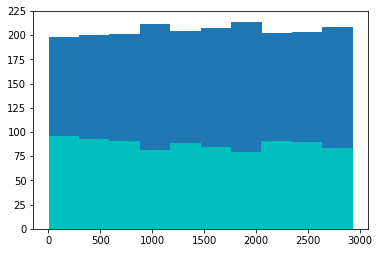

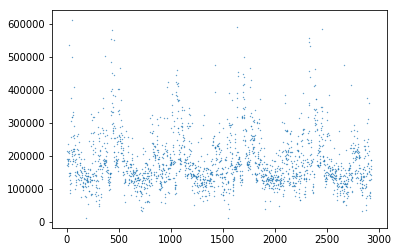

PID 1


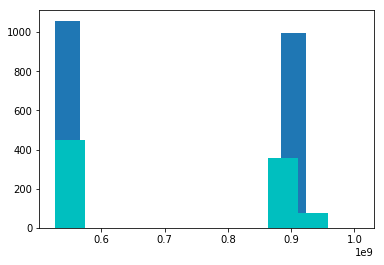

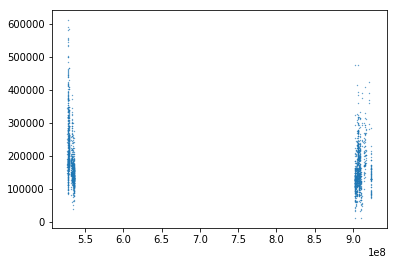

MS SubClass 2


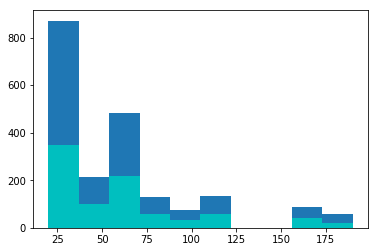

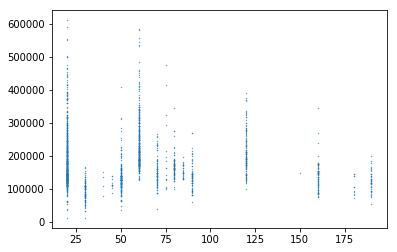

MS Zoning 3


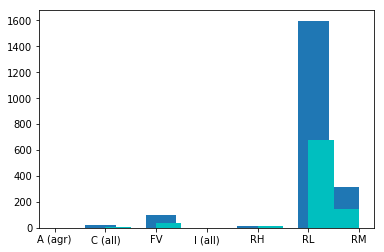

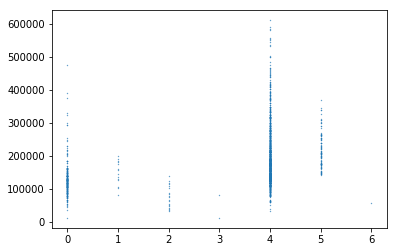

Lot Frontage 4


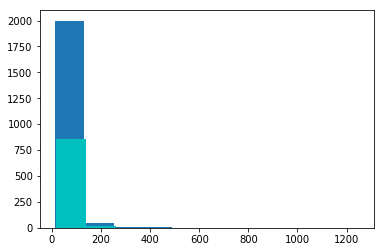

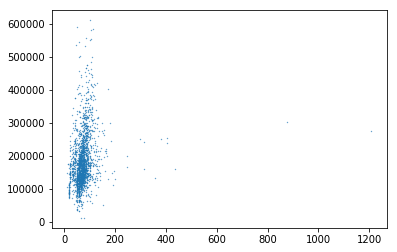

Lot Area 5


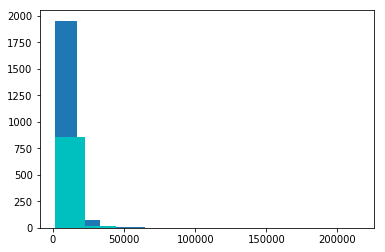

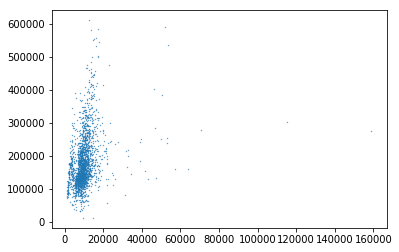

Street 6


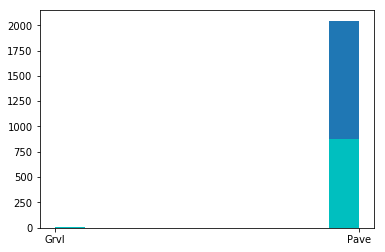

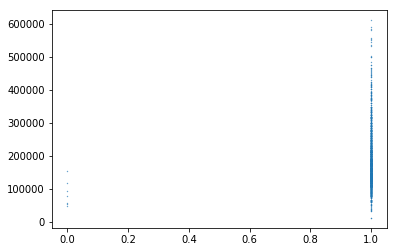

Alley 7


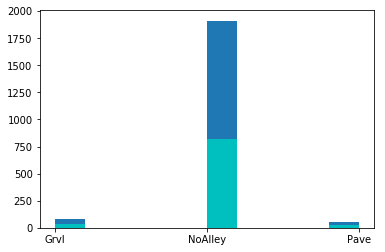

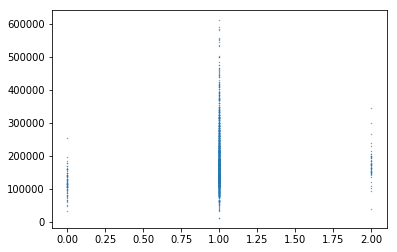

Lot Shape 8


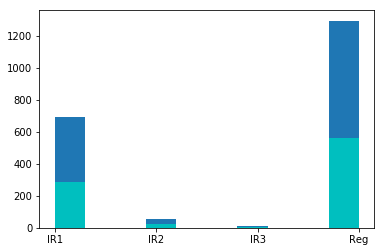

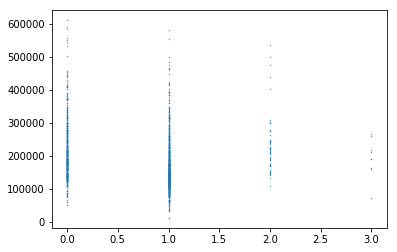

Land Contour 9


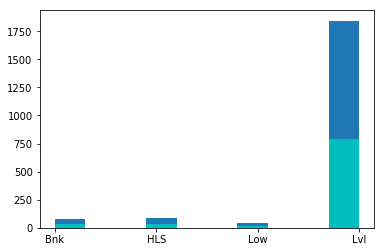

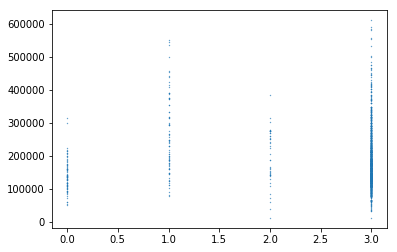

Utilities 10


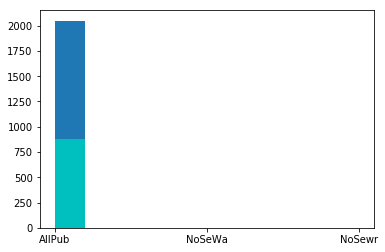

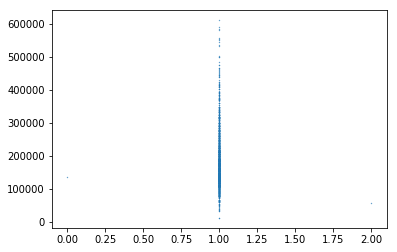

Lot Config 11


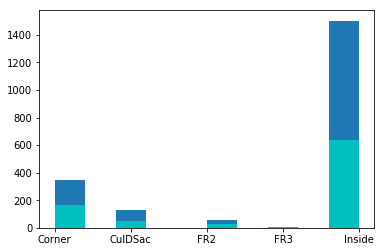

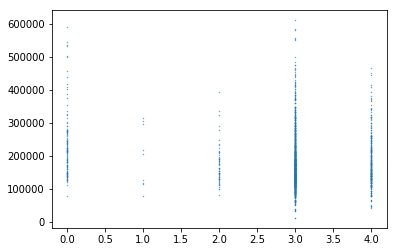

Land Slope 12


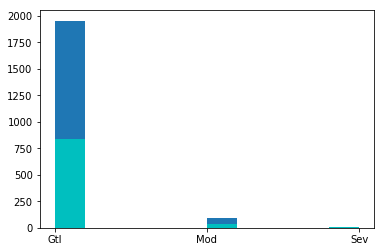

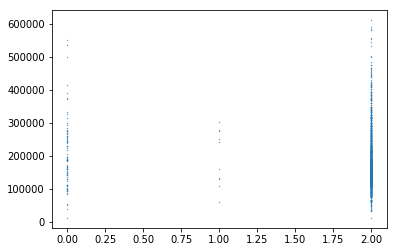

Neighborhood 13


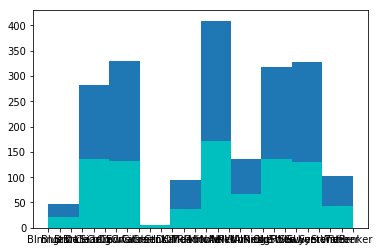

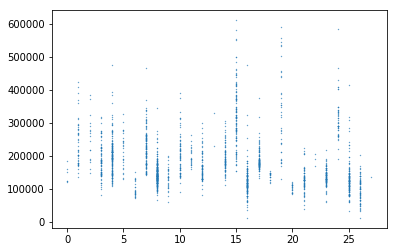

Condition 1 14


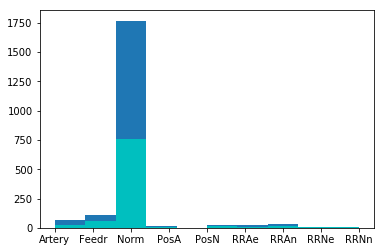

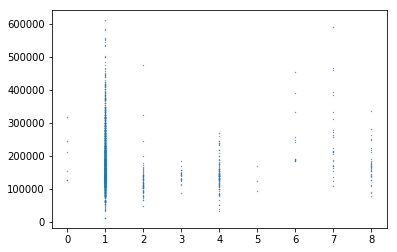

Condition 2 15


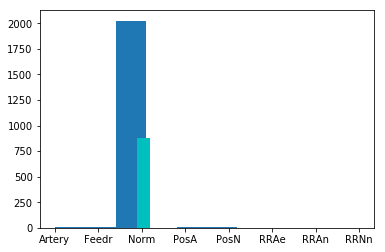

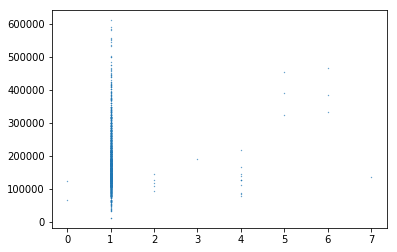

Bldg Type 16


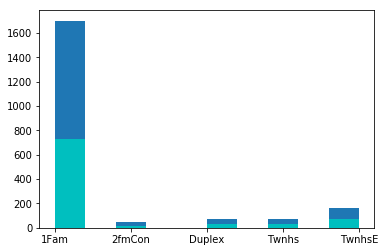

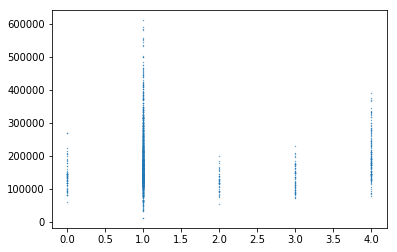

House Style 17


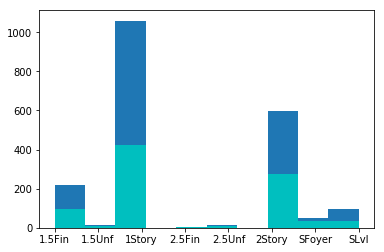

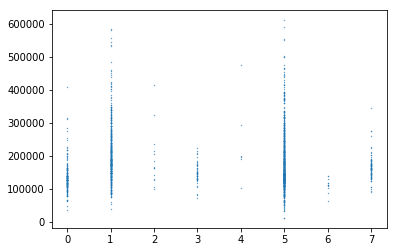

Overall Qual 18


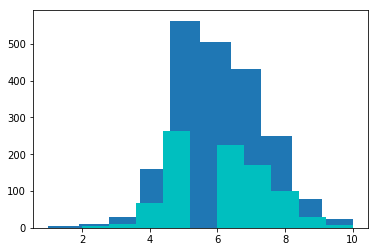

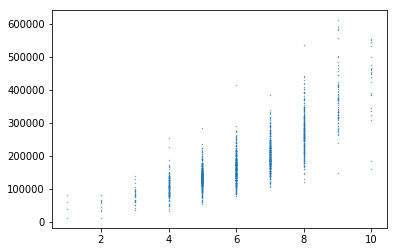

Overall Cond 19


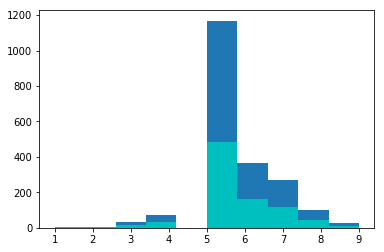

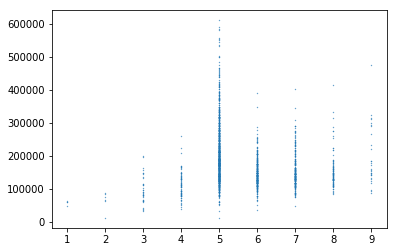

Year Built 20


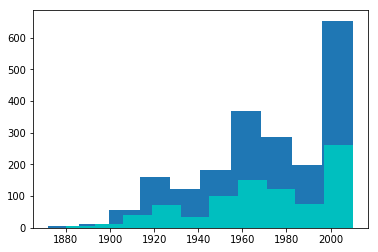

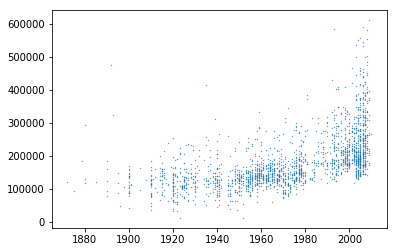

Year Remod/Add 21


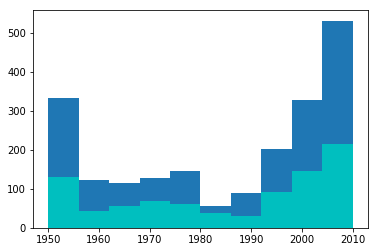

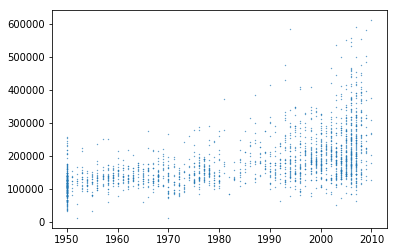

Roof Style 22


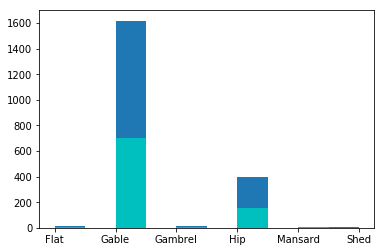

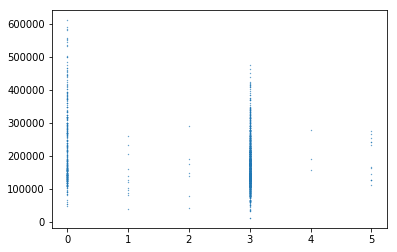

Roof Matl 23


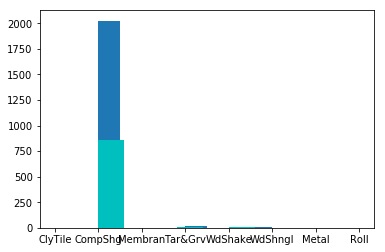

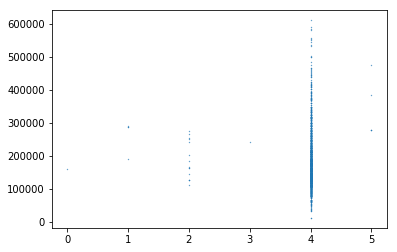

Exterior 1st 24


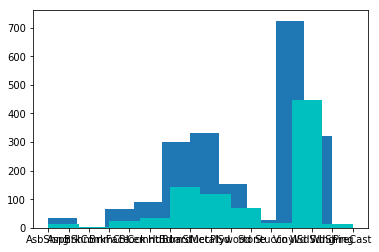

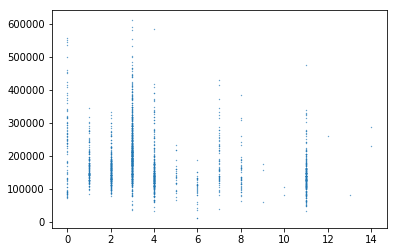

Exterior 2nd 25


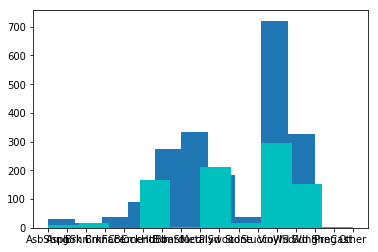

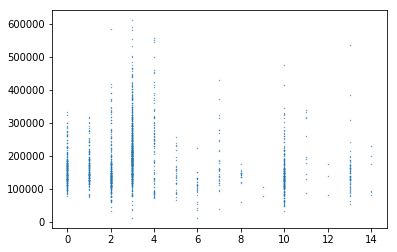

Mas Vnr Type 26


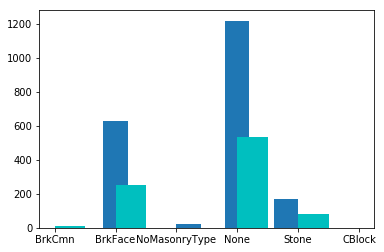

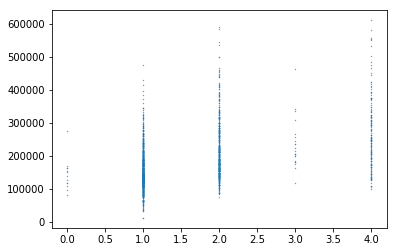

Mas Vnr Area 27


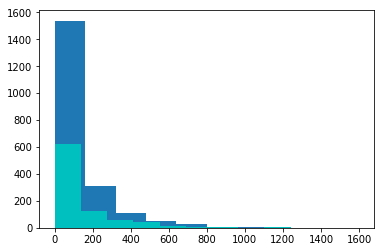

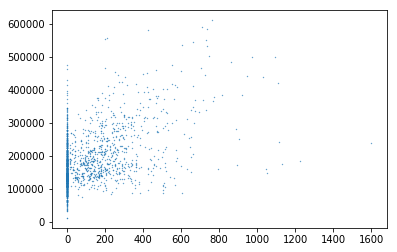

Exter Qual 28


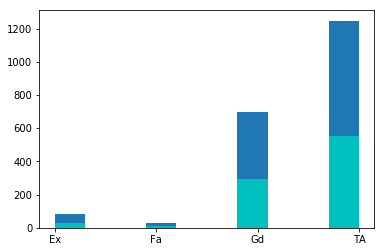

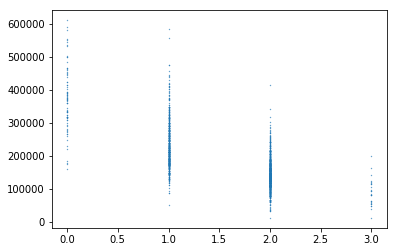

Exter Cond 29


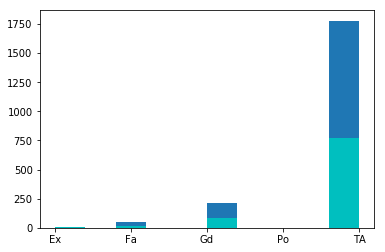

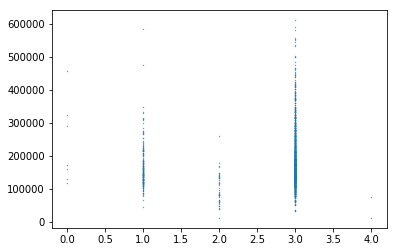

Foundation 30


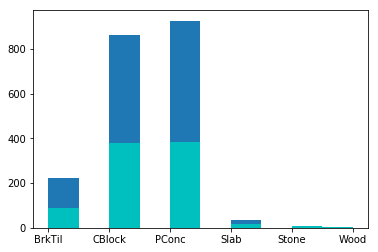

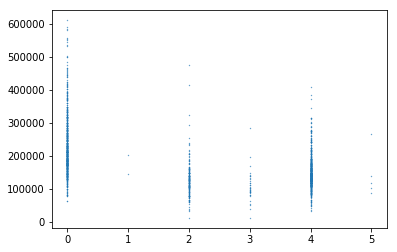

Bsmt Qual 31


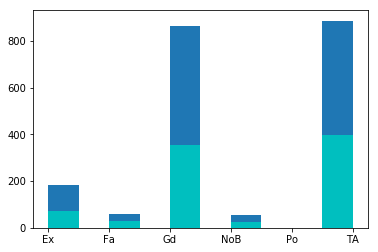

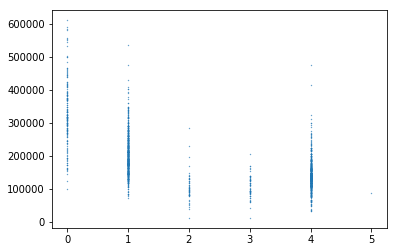

Bsmt Cond 32


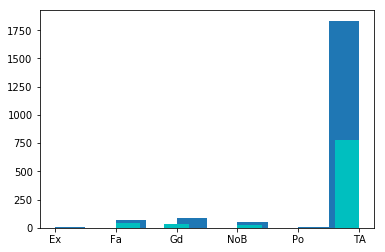

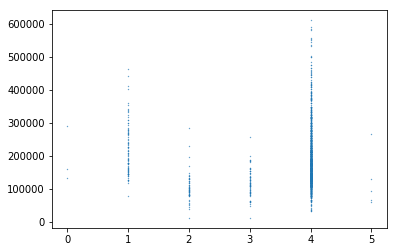

Bsmt Exposure 33


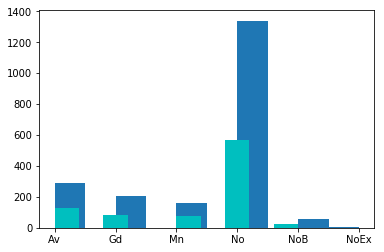

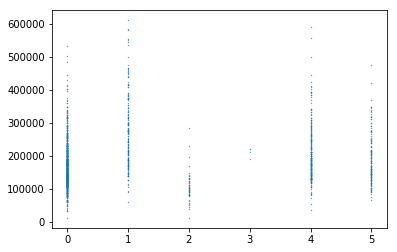

BsmtFin Type 1 34


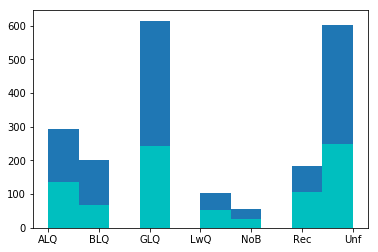

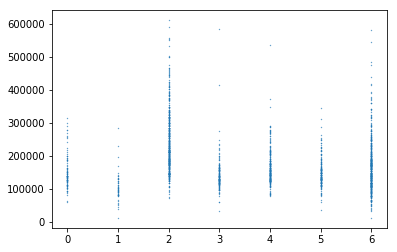

BsmtFin SF 1 35


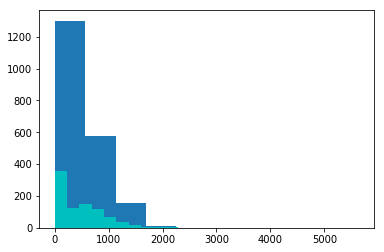

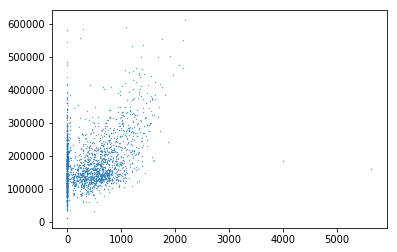

BsmtFin Type 2 36


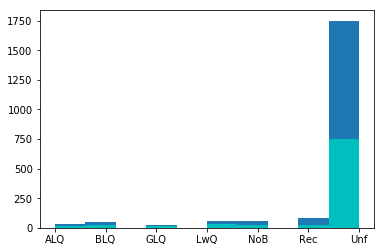

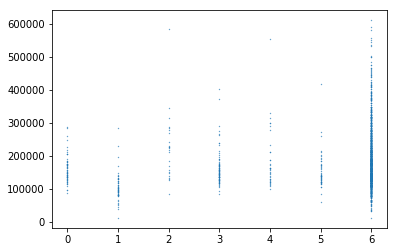

BsmtFin SF 2 37


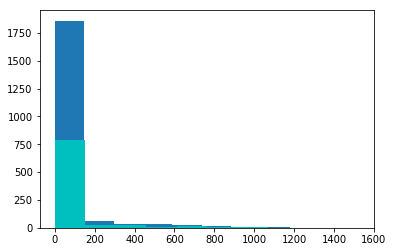

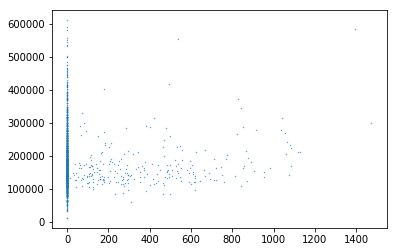

Bsmt Unf SF 38


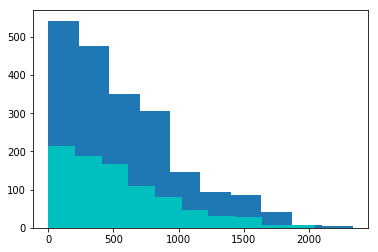

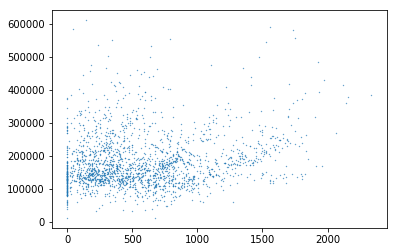

Total Bsmt SF 39


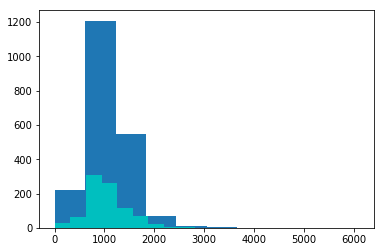

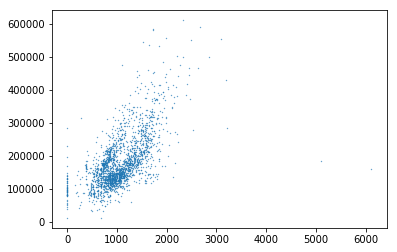

Heating 40


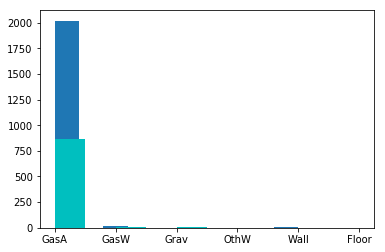

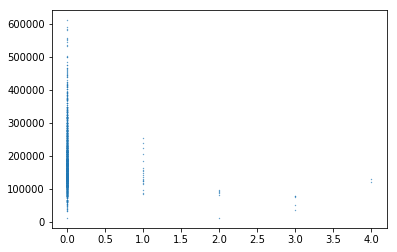

Heating QC 41


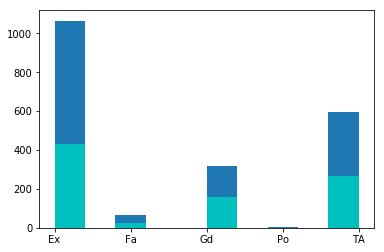

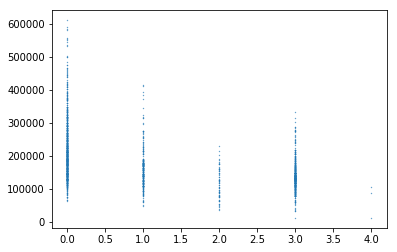

Central Air 42


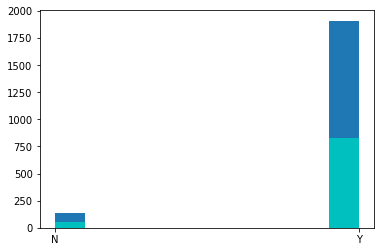

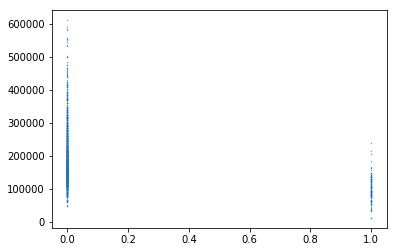

Electrical 43


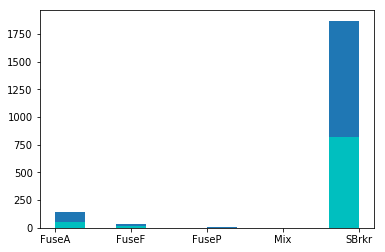

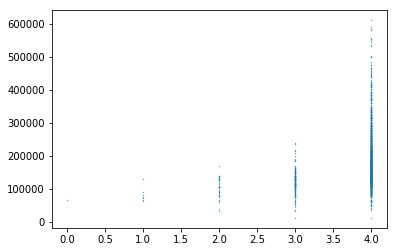

1st Flr SF 44


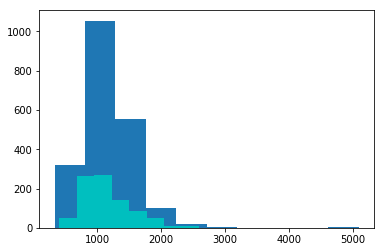

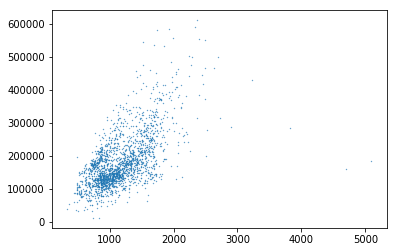

2nd Flr SF 45


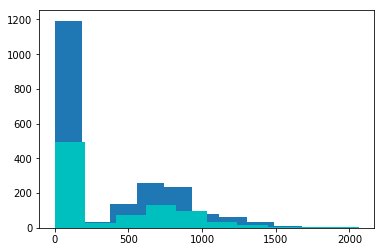

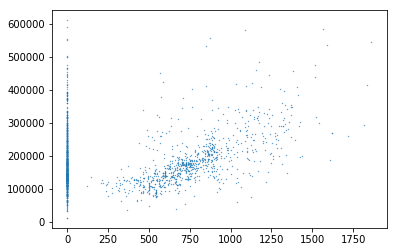

Low Qual Fin SF 46


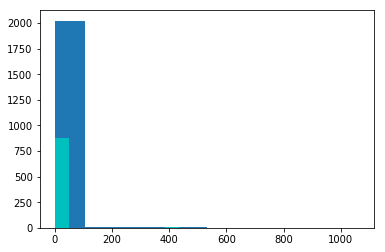

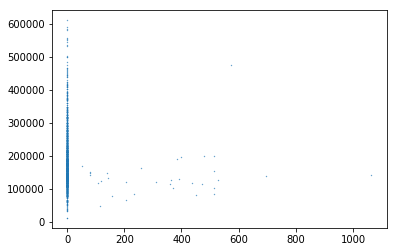

Gr Liv Area 47


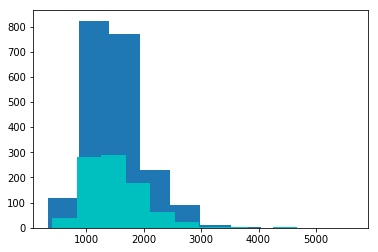

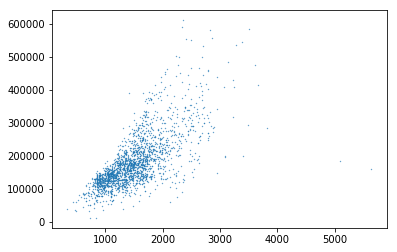

Bsmt Full Bath 48


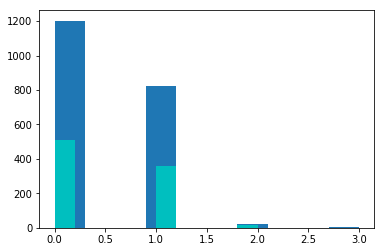

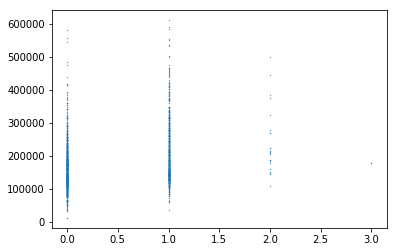

Bsmt Half Bath 49


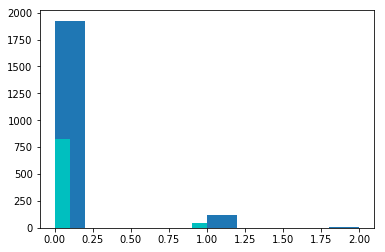

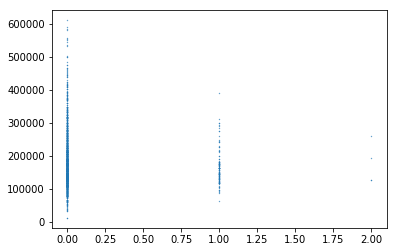

Full Bath 50


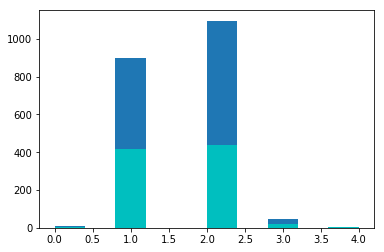

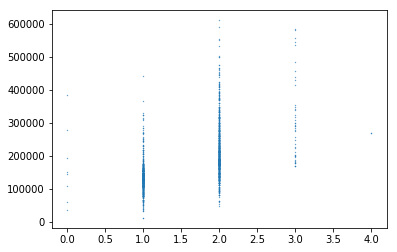

Half Bath 51


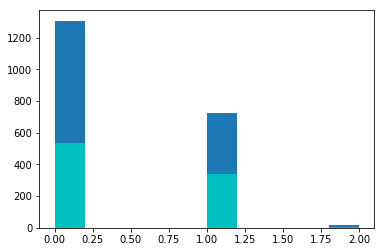

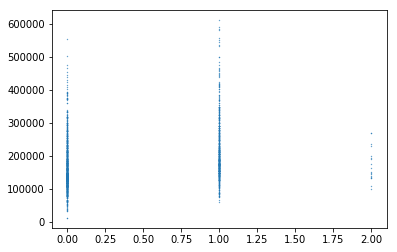

Bedroom AbvGr 52


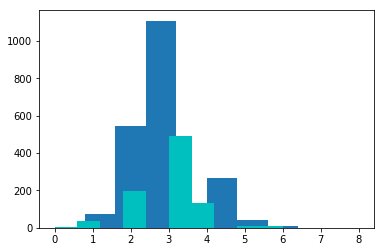

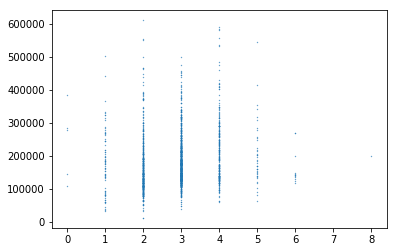

Kitchen AbvGr 53


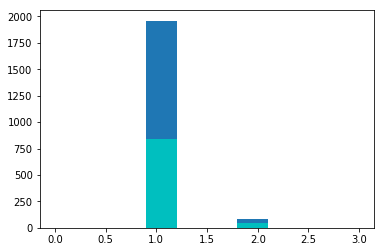

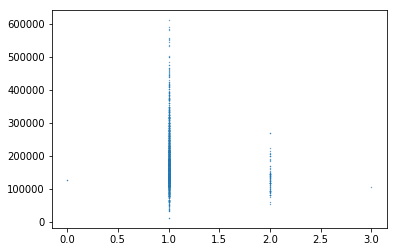

Kitchen Qual 54


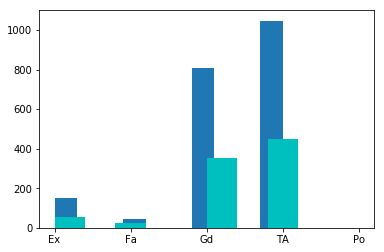

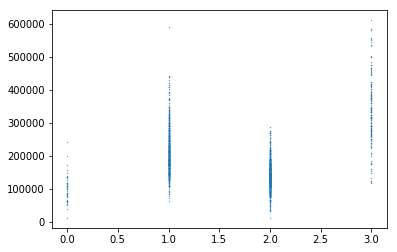

TotRms AbvGrd 55


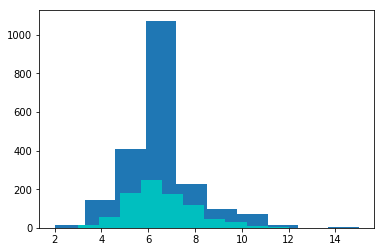

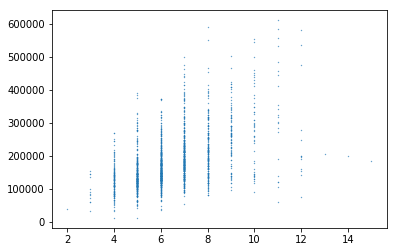

Functional 56


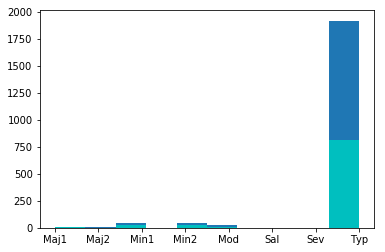

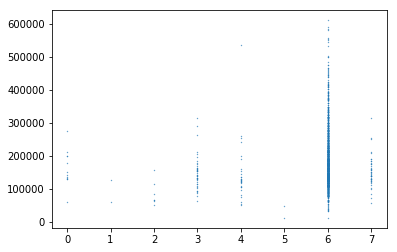

Fireplaces 57


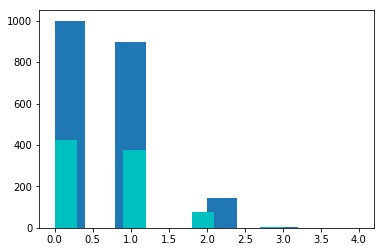

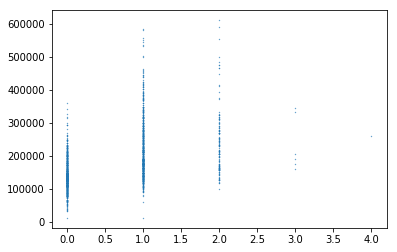

Fireplace Qu 58


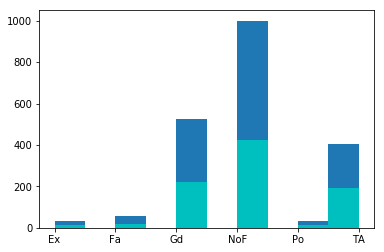

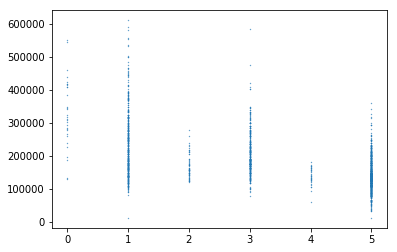

Garage Type 59


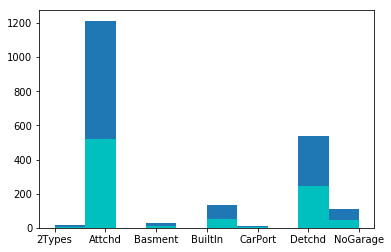

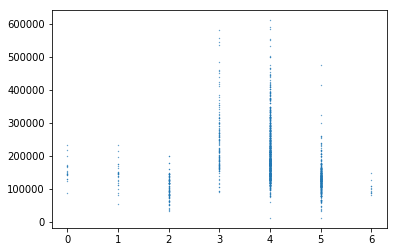

Garage Yr Blt 60


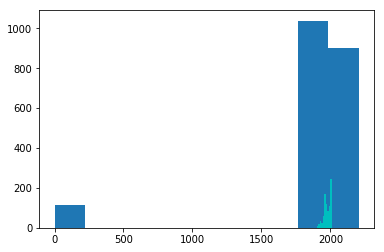

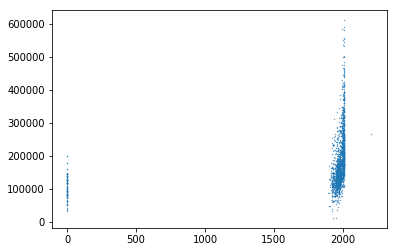

Garage Finish 61


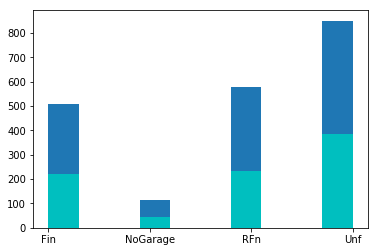

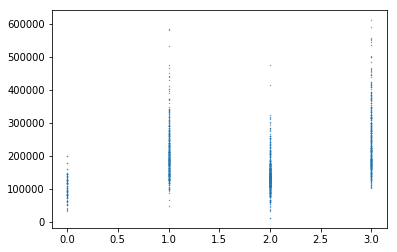

Garage Cars 62


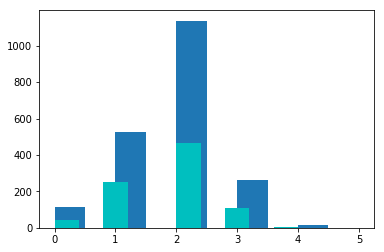

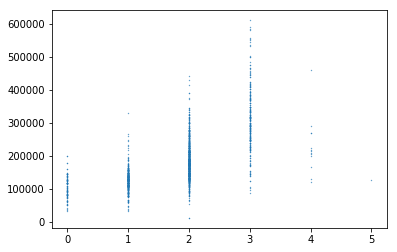

Garage Area 63


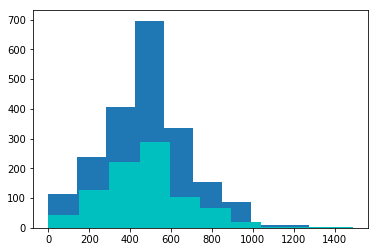

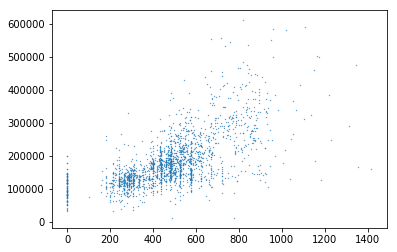

Garage Qual 64


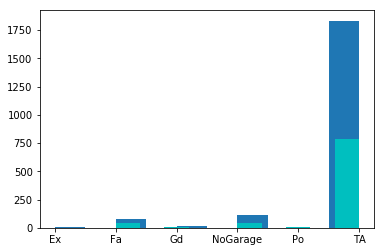

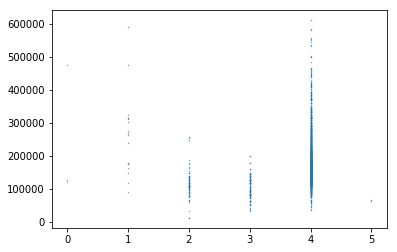

Garage Cond 65


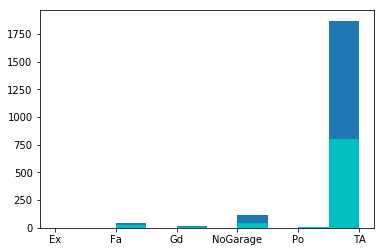

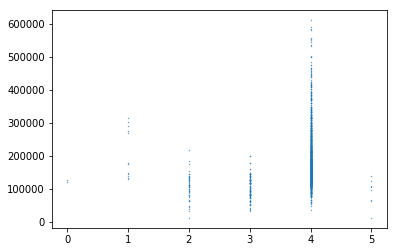

Paved Drive 66


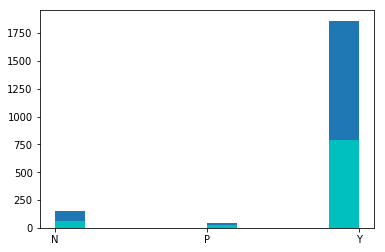

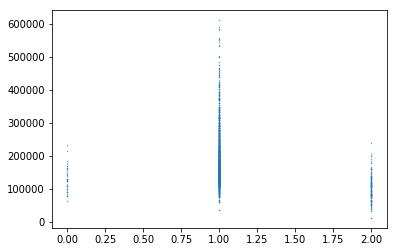

Wood Deck SF 67


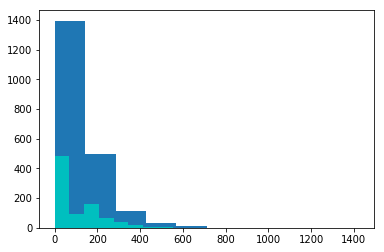

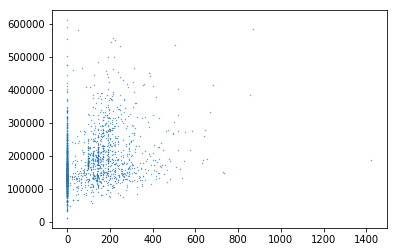

Open Porch SF 68


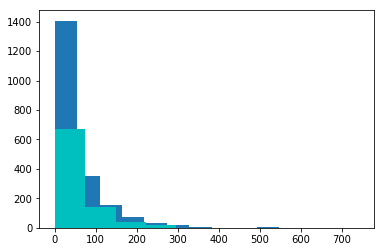

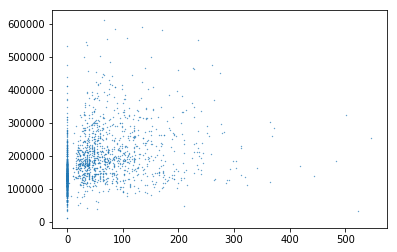

Enclosed Porch 69


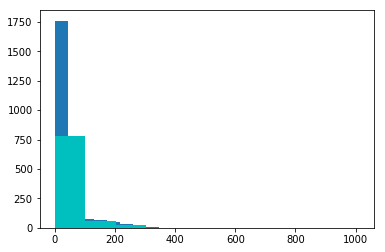

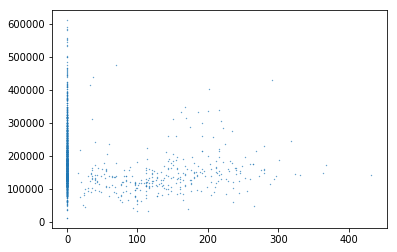

3Ssn Porch 70


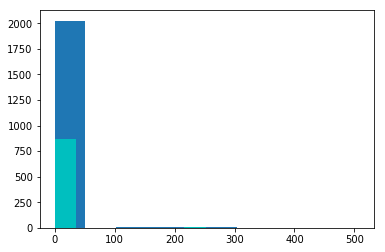

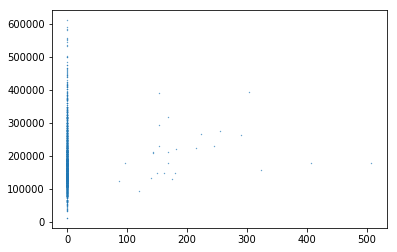

Screen Porch 71


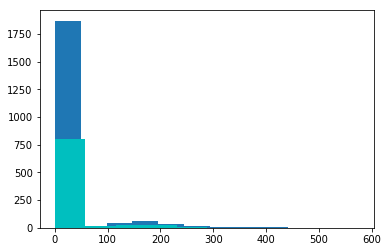

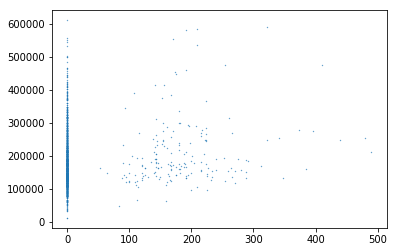

Pool Area 72


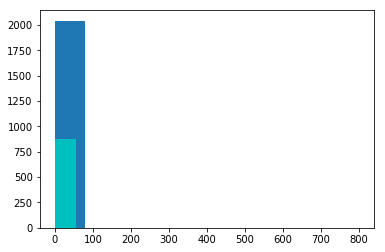

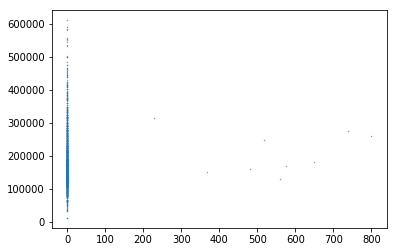

Pool QC 73


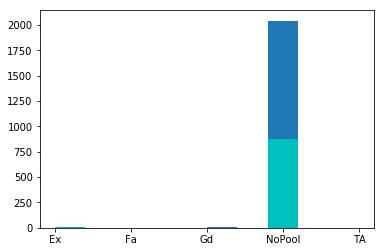

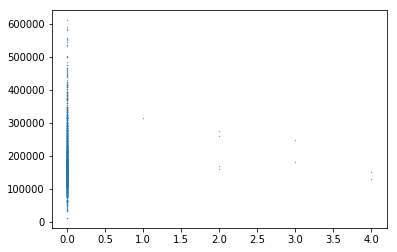

Fence 74


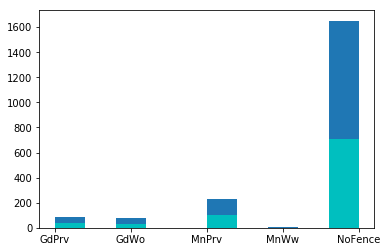

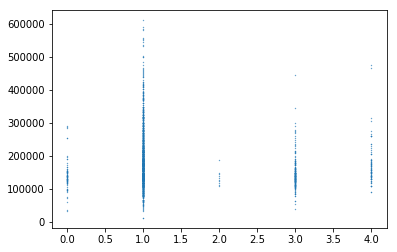

Misc Feature 75


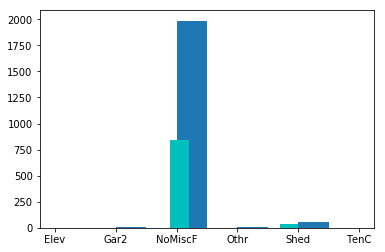

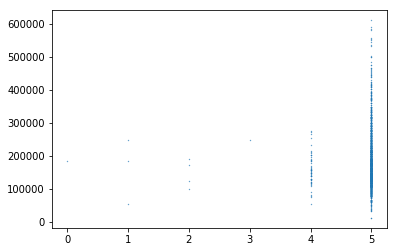

Misc Val 76


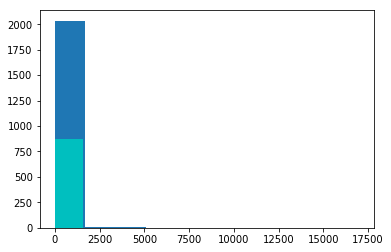

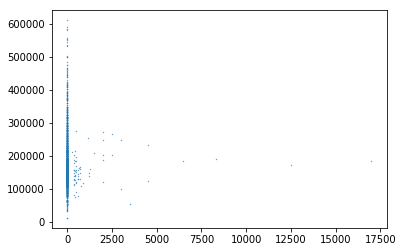

Mo Sold 77


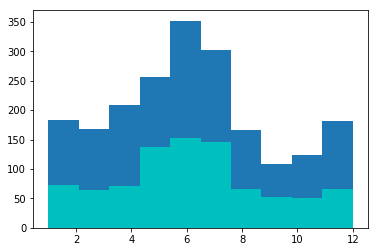

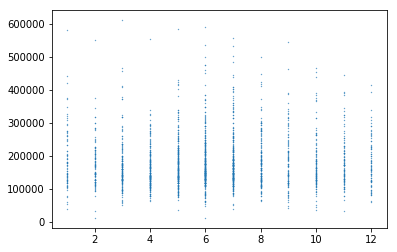

Yr Sold 78


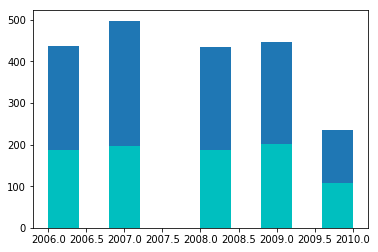

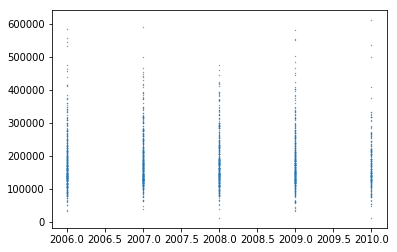

Sale Type 79


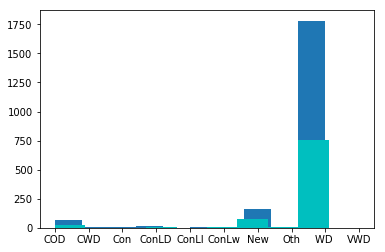

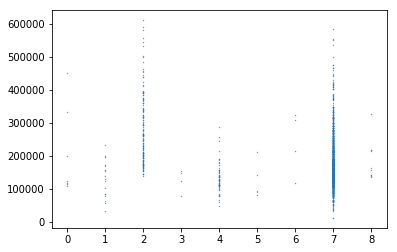

SalePrice 80


KeyError: 'SalePrice'

In [7]:
#v = 2
for v in range(len(train_cols)-1):
    print(train_cols[v], v)
    EDA_plot1(df[train_cols[v]], df_test[train_cols[v]])
    print(" ")
    EDA_plot2(df[train_cols[v]], df['SalePrice'])

---

I've decided that I want to group the neighborhoods by average sale price.

---

In [17]:
a = df.groupby(by =['Neighborhood'])['SalePrice'].mean()

In [18]:
a

Neighborhood
Blmngtn    200417.681818
Blueste    144566.666667
BrDale     103371.052632
BrkSide    127022.697368
ClearCr    217490.074074
CollgCr    202497.216667
Crawfor    205901.211268
Edwards    130493.468531
Gilbert    189228.387931
Greens     188666.666667
GrnHill    280000.000000
IDOTRR     101103.188406
Landmrk    137000.000000
MeadowV    100231.250000
Mitchel    167656.707317
NAmes      145905.816129
NPkVill    140476.470588
NWAmes     194619.022989
NoRidge    316294.125000
NridgHt    322831.352459
OldTown    125276.300613
SWISU      134758.875000
Sawyer     137181.909910
SawyerW    187760.160920
Somerst    227183.900000
StoneBr    329675.736842
Timber     241051.354167
Veenker    253570.588235
Name: SalePrice, dtype: float64

In [ ]:
# break into 7 groups by means - features added in data cleansing workbook


(array([  2.,   0.,   6.,  13.,  81., 440., 835., 462., 177.,  35.]),
 array([ 9.45634071,  9.84309933, 10.22985795, 10.61661658, 11.0033752 ,
        11.39013383, 11.77689245, 12.16365107, 12.5504097 , 12.93716832,
        13.32392695]),
 <a list of 10 Patch objects>)

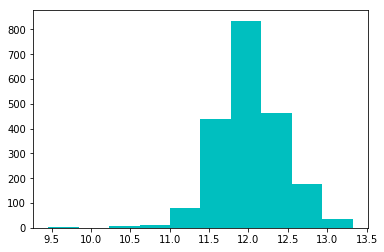

In [13]:
import numpy as np
#plt.hist(df['SalePrice'])
plt.hist(np.log(df['SalePrice']), color='c')
#plt.show();